In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.svm import SVC
from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv("data/test.csv", sep=";", decimal=',')
test.drop(['zibzin', 'idavisautorisationcheque','datetransaction'], axis=1, inplace=True)
y_test=np.array(test['flagimpaye'])
x_test=test.drop(['flagimpaye'], axis=1)
print(y_test.shape, x_test.shape)

(264143,) (264143, 19)


In [3]:
train = pd.read_csv("data/undersampled_train.csv", sep=";", decimal=',')
#train.drop(['zibzin', 'idavisautorisationcheque','datetransaction'], axis=1, inplace=True)
y_train=np.array(train['flagimpaye'])
x_train=train.drop(['flagimpaye'], axis=1)
train['flagimpaye'].value_counts()

0    458116
1      5402
Name: flagimpaye, dtype: int64

In [5]:
nearmiss = NearMiss(version=1, n_neighbors=5, sampling_strategy={0:48618, 1:5402})
x_nm, y_nm = nearmiss.fit_resample(x_train, y_train)
x_nm.shape

(54020, 19)

In [6]:
svclassifier = SVC(class_weight='balanced')
svclassifier.fit(x_nm, y_nm)
y_pred = svclassifier.predict(x_test)

SVC(class_weight='balanced')

In [7]:
y_pred = svclassifier.predict(x_test)

In [8]:
print(f1_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.005659560326683519
[[165123  98165]
 [   574    281]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.77    263288
           1       0.00      0.33      0.01       855

    accuracy                           0.63    264143
   macro avg       0.50      0.48      0.39    264143
weighted avg       0.99      0.63      0.77    264143



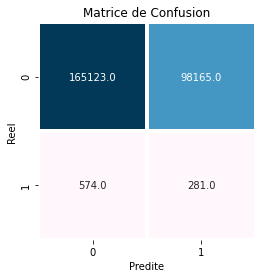

In [23]:
cm=confusion_matrix(y_test, y_pred)

#sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True, cmap='PuBu',color="#cd1076")
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=3,square=True,cmap='PuBu',color="#cd1076", cbar=False)
plt.ylabel('Reel')
plt.xlabel('Predite')
plt.title('Matrice de Confusion',size=12)
plt.show()